In [1]:
"""@author Okorie Ndubuisi March 2025"""
import numpy as np
import matplotlib.pyplot as plt
from logisticregression import LogisticRegression
import seaborn as sns
import pandas as pd
sns.set_theme()

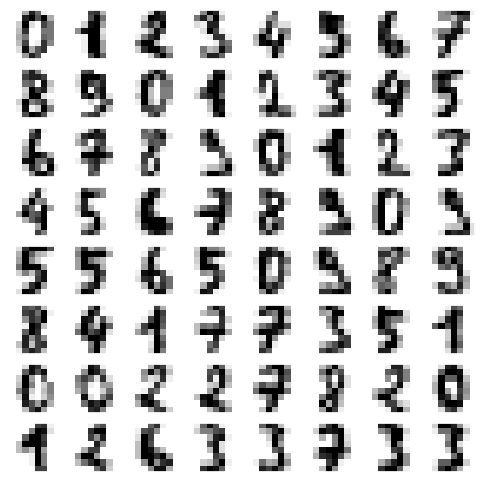

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [3]:
X = np.array(digits.data[:200, :], dtype=np.float64)
Y = digits.target[:200]

X_test = digits.data[200:, :]
Y_true = digits.target[200:]

In [4]:
X.shape

(200, 64)

In [5]:
Y.shape

(200,)

In [22]:
model = LogisticRegression()

In [23]:
K = 10
W = np.zeros(shape=(X.shape[1], K))
b = np.zeros(shape=(1, K))
lambda_ = 1
num_iters = 100000
decimals = 8

In [24]:
d = model.fit(X, Y, W, b, learning_rate=1e-8, optimizer='adam', decay=True, 
              num_iters=num_iters, epochs=1, lambda_=lambda_, bias=True)
W = d['W']
b = d['b']
costs = d['costs']
W_history = d['W_history']
b_history = d['W_history']
iterations = d['iterations']

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 3.80044096   
Iteration 10000: Cost 3.79858585   
Iteration 20000: Cost 3.79676583   
Iteration 30000: Cost 3.79498227   
Iteration 40000: Cost 3.79323469   
Iteration 50000: Cost 3.79152264   
Iteration 60000: Cost 3.78984615   
Iteration 70000: Cost 3.78820522   
Iteration 80000: Cost 3.78659988   
Iteration 90000: Cost 3.78503013   
Iteration 99999: Cost 3.78349614   


In [25]:
W[:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00223616, -0.00223617,  0.00223658,  0.00223658, -0.00223616,
         0.00223658, -0.00223616, -0.00223617,  0.00223658,  0.00223657],
       [ 0.00223658,  0.00223654,  0.00223658,  0.00223658,  0.00223654,
         0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658],
       [ 0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658,
         0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658],
       [ 0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658,
         0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658]])

In [26]:
b

array([[0.00223658, 0.00223658, 0.00223658, 0.00223658, 0.00223658,
        0.00223658, 0.00223658, 0.00223658, 0.00223658, 0.00223658]])

In [27]:
print(W.shape)
print(b.shape)

(64, 10)
(1, 10)


In [28]:
X_test.shape

(1597, 64)

In [29]:
test_predictions = model.predict(X_test, W, b)

In [30]:
print(test_predictions.shape)

(1597,)


In [31]:
test_accuracy = (len(Y_true[np.where(Y_true == test_predictions)]) / len(Y_true)) * 100
test_accuracy

63.68190356919223

In [32]:
train_predictions = model.predict(X, W, b)

In [33]:
train_accuracy = (len(Y[np.where(Y == train_predictions)]) / len(Y)) * 100
train_accuracy

93.0

Our model is overfitting the data, it seems that we need more data for the model to start performing well.

In [18]:
best_weights, best_bias, lowest_cost = model.get_best_params()

In [19]:
lowest_cost

np.float64(3.783485107149585)

In [20]:
best_bias

array([[0.00223658, 0.00223658, 0.00223658, 0.00223658, 0.00223658,
        0.00223658, 0.00223658, 0.00223658, 0.00223658, 0.00223658]])

In [21]:
best_weights

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00223617, -0.00223618,  0.00223658,  0.00223658, -0.00223617,
         0.00223658, -0.00223617, -0.00223618,  0.00223658,  0.00223657],
       [ 0.00223658,  0.00223654,  0.00223658,  0.00223658,  0.00223654,
         0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658],
       [ 0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658,
         0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658],
       [ 0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658,
         0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658],
       [ 0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658,
         0.00223658,  0.00223658,  0.00223658,  0.00223658,  0.00223658],
       [-0.00223635,  0.00223658,  0.00223658,  0.00223658, -0.00223635,
         0.00223658, -0.00223635,  0.00223658